In [2]:
!pip install -q --upgrade jcopdl==1.1.10

In [3]:
from jcopdl.callback import set_config

In [4]:
# data = "damped_sine"
data = "jkse"

config = set_config({
    "input_size": 1,
    "seq_len": 2,
    "batch_size": 32,
    "output_size": 1,
    "hidden_size": 256,
    "num_layers": 2,
    "dropout": 0.2,
    "bidirectional": False, # True/False
    "cell_type": "gru" # rnn/gru/lstm
})

lr = 0.00001

# Jangan edit code di bawah ini

In [5]:
import torch
import matplotlib.pyplot as plt
    
def data4pred(model, dataset, dataloader, device):    
    preds, targets = [], []
    hidden = None
    with torch.no_grad():
        model.eval()
        for inputs, target in dataloader:
            inputs = inputs.to(device)
            
            output, hidden = model(inputs, hidden)
            preds += output.flatten().tolist()
            targets += target.flatten().tolist()

    plt.plot(dataset.target_ticks, targets, 'b-', label="data")
    plt.plot(dataset.target_ticks, preds, 'r-', label="pred")
    plt.legend()    
    
def pred4pred(model, dataset, dataloader, device, n_prior=75, n_forecast=30):
    preds, targets = [], []
    hidden = None    
    end = n_prior + n_forecast    
    with torch.no_grad():
        model.eval()       
        for idx, (inputs, target) in enumerate(dataloader):
            if idx == end:
                break
            elif idx > n_prior:
                inputs[0, 0, 0] = preds[-1]
                
            inputs = inputs.to(device)
            output, hidden = model(inputs, hidden)
            
            if idx > n_prior:
                preds.append(output.flatten().tolist()[-1])
            else:
                preds += output.flatten().tolist()   
            targets += target.flatten().tolist()

    plt.plot(dataset.target_ticks[:n_prior], targets[:n_prior], 'b-', label="history_data")
    plt.plot(dataset.target_ticks[n_prior:end], targets[n_prior:], 'b-', label="unseen_data", alpha=0.3)
    plt.plot(dataset.target_ticks[:end], preds, 'r-', label="prediction")
    plt.axvline(dataset.target_ticks[n_prior], color='k', linestyle="--", linewidth=1)
    plt.legend()            

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(N, S, F): (969, 2, 1)
Note: last 1 data excluded

(N, S, F): (242, 2, 1)
Note: last 1 data excluded



Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.8149 | Test_cost  = 1.8202 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.7911 | Test_cost  = 1.7831 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.7694 | Test_cost  = 1.7437 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.7478 | Test_cost  = 1.7030 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.7257 | Test_cost  = 1.6603 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.7020 | Test_cost  = 1.6150 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.6769 | Test_cost  = 1.5664 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.6510 | Test_cost  = 1.5143 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.6234 | Test_cost  = 1.4580 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.5953 | Test_cost  = 1.3967 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.5637 | Test_cost  = 1.3300 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.5314 | Test_cost  = 1.2572 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.4953 | Test_cost  = 1.1777 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.4568 | Test_cost  = 1.0914 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.4159 | Test_cost  = 0.9980 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.3712 | Test_cost  = 0.8981 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.3274 | Test_cost  = 0.7935 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.2789 | Test_cost  = 0.6868 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.2342 | Test_cost  = 0.5822 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.1909 | Test_cost  = 0.4856 | 


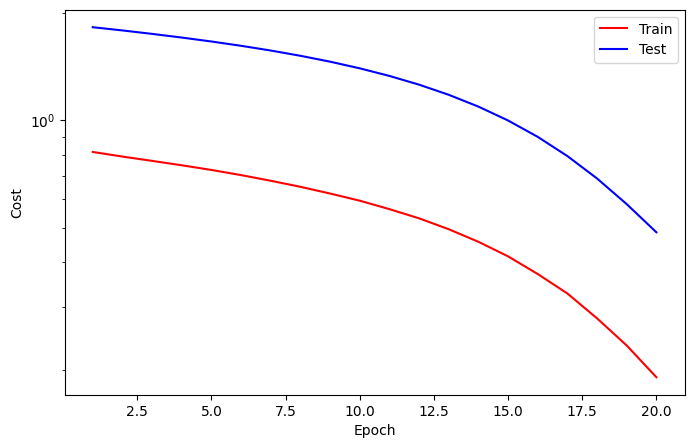

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.1547 | Test_cost  = 0.4026 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.1278 | Test_cost  = 0.3376 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.1102 | Test_cost  = 0.2912 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.1011 | Test_cost  = 0.2607 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.0969 | Test_cost  = 0.2414 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.0946 | Test_cost  = 0.2288 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.0934 | Test_cost  = 0.2203 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.0916 | Test_cost  = 0.2136 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    29
Train_cost  = 0.0913 | Test_cost  = 0.2085 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    30
Train_cost  = 0.0888 | Test_cost  = 0.2043 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    31
Train_cost  = 0.0889 | Test_cost  = 0.2013 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    32
Train_cost  = 0.0882 | Test_cost  = 0.1987 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    33
Train_cost  = 0.0877 | Test_cost  = 0.1962 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    34
Train_cost  = 0.0859 | Test_cost  = 0.1938 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    35
Train_cost  = 0.0855 | Test_cost  = 0.1919 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    36
Train_cost  = 0.0845 | Test_cost  = 0.1906 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    37
Train_cost  = 0.0833 | Test_cost  = 0.1885 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    38
Train_cost  = 0.0828 | Test_cost  = 0.1866 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    39
Train_cost  = 0.0815 | Test_cost  = 0.1848 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    40
Train_cost  = 0.0813 | Test_cost  = 0.1834 | 


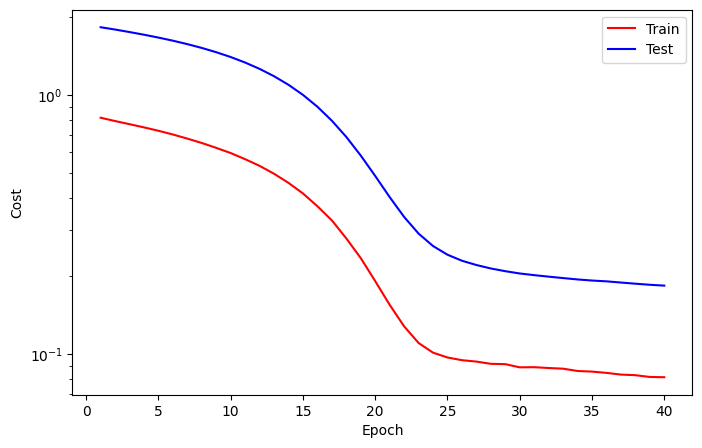

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    41
Train_cost  = 0.0796 | Test_cost  = 0.1815 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    42
Train_cost  = 0.0793 | Test_cost  = 0.1799 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    43
Train_cost  = 0.0788 | Test_cost  = 0.1781 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    44
Train_cost  = 0.0771 | Test_cost  = 0.1767 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    45
Train_cost  = 0.0771 | Test_cost  = 0.1752 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    46
Train_cost  = 0.0763 | Test_cost  = 0.1736 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    47
Train_cost  = 0.0753 | Test_cost  = 0.1720 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    48
Train_cost  = 0.0741 | Test_cost  = 0.1705 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    49
Train_cost  = 0.0738 | Test_cost  = 0.1690 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    50
Train_cost  = 0.0727 | Test_cost  = 0.1675 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    51
Train_cost  = 0.0720 | Test_cost  = 0.1659 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    52
Train_cost  = 0.0716 | Test_cost  = 0.1645 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    53
Train_cost  = 0.0707 | Test_cost  = 0.1631 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    54
Train_cost  = 0.0703 | Test_cost  = 0.1617 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    55
Train_cost  = 0.0694 | Test_cost  = 0.1603 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    56
Train_cost  = 0.0689 | Test_cost  = 0.1589 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    57
Train_cost  = 0.0677 | Test_cost  = 0.1574 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    58
Train_cost  = 0.0674 | Test_cost  = 0.1562 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    59
Train_cost  = 0.0663 | Test_cost  = 0.1548 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    60
Train_cost  = 0.0659 | Test_cost  = 0.1533 | 


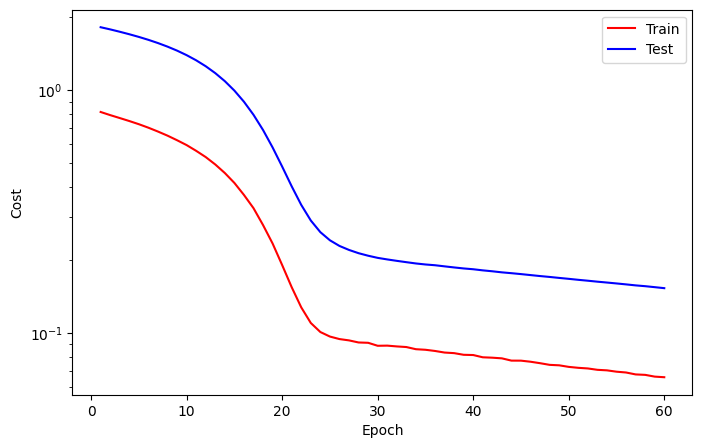

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    61
Train_cost  = 0.0650 | Test_cost  = 0.1518 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    62
Train_cost  = 0.0645 | Test_cost  = 0.1508 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    63
Train_cost  = 0.0644 | Test_cost  = 0.1495 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    64
Train_cost  = 0.0634 | Test_cost  = 0.1482 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    65
Train_cost  = 0.0620 | Test_cost  = 0.1468 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    66
Train_cost  = 0.0615 | Test_cost  = 0.1454 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    67
Train_cost  = 0.0607 | Test_cost  = 0.1443 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    68
Train_cost  = 0.0599 | Test_cost  = 0.1431 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    69
Train_cost  = 0.0595 | Test_cost  = 0.1417 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    70
Train_cost  = 0.0592 | Test_cost  = 0.1403 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    71
Train_cost  = 0.0588 | Test_cost  = 0.1391 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    72
Train_cost  = 0.0581 | Test_cost  = 0.1376 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    73
Train_cost  = 0.0569 | Test_cost  = 0.1367 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    74
Train_cost  = 0.0566 | Test_cost  = 0.1355 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    75
Train_cost  = 0.0559 | Test_cost  = 0.1341 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    76
Train_cost  = 0.0551 | Test_cost  = 0.1330 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    77
Train_cost  = 0.0545 | Test_cost  = 0.1317 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    78
Train_cost  = 0.0540 | Test_cost  = 0.1305 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    79
Train_cost  = 0.0538 | Test_cost  = 0.1294 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    80
Train_cost  = 0.0526 | Test_cost  = 0.1281 | 


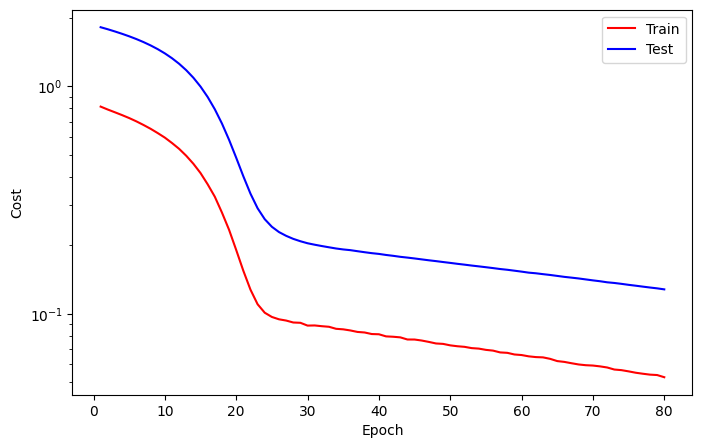

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    81
Train_cost  = 0.0520 | Test_cost  = 0.1269 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    82
Train_cost  = 0.0519 | Test_cost  = 0.1259 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    83
Train_cost  = 0.0510 | Test_cost  = 0.1246 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    84
Train_cost  = 0.0503 | Test_cost  = 0.1235 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    85
Train_cost  = 0.0498 | Test_cost  = 0.1223 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    86
Train_cost  = 0.0498 | Test_cost  = 0.1212 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    87
Train_cost  = 0.0487 | Test_cost  = 0.1199 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    88
Train_cost  = 0.0479 | Test_cost  = 0.1189 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    89
Train_cost  = 0.0477 | Test_cost  = 0.1179 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    90
Train_cost  = 0.0473 | Test_cost  = 0.1168 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    91
Train_cost  = 0.0469 | Test_cost  = 0.1157 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    92
Train_cost  = 0.0467 | Test_cost  = 0.1147 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    93
Train_cost  = 0.0456 | Test_cost  = 0.1137 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    94
Train_cost  = 0.0456 | Test_cost  = 0.1127 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    95
Train_cost  = 0.0448 | Test_cost  = 0.1114 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    96
Train_cost  = 0.0440 | Test_cost  = 0.1106 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    97
Train_cost  = 0.0439 | Test_cost  = 0.1096 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    98
Train_cost  = 0.0437 | Test_cost  = 0.1085 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch    99
Train_cost  = 0.0432 | Test_cost  = 0.1075 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   100
Train_cost  = 0.0425 | Test_cost  = 0.1063 | 


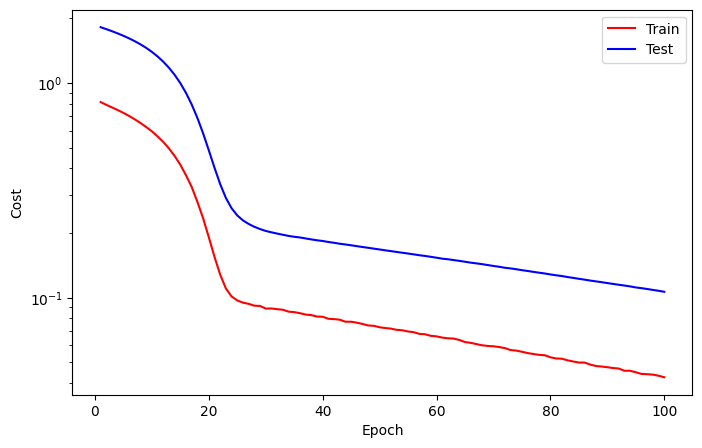

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   101
Train_cost  = 0.0424 | Test_cost  = 0.1055 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   102
Train_cost  = 0.0416 | Test_cost  = 0.1046 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   103
Train_cost  = 0.0412 | Test_cost  = 0.1036 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   104
Train_cost  = 0.0413 | Test_cost  = 0.1028 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   105
Train_cost  = 0.0405 | Test_cost  = 0.1017 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   106
Train_cost  = 0.0400 | Test_cost  = 0.1010 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   107
Train_cost  = 0.0399 | Test_cost  = 0.0999 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   108
Train_cost  = 0.0390 | Test_cost  = 0.0990 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   109
Train_cost  = 0.0386 | Test_cost  = 0.0982 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   110
Train_cost  = 0.0384 | Test_cost  = 0.0973 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   111
Train_cost  = 0.0376 | Test_cost  = 0.0965 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   112
Train_cost  = 0.0374 | Test_cost  = 0.0957 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   113
Train_cost  = 0.0375 | Test_cost  = 0.0948 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   114
Train_cost  = 0.0368 | Test_cost  = 0.0941 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   115
Train_cost  = 0.0368 | Test_cost  = 0.0932 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   116
Train_cost  = 0.0361 | Test_cost  = 0.0924 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   117
Train_cost  = 0.0363 | Test_cost  = 0.0916 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   118
Train_cost  = 0.0357 | Test_cost  = 0.0908 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   119
Train_cost  = 0.0355 | Test_cost  = 0.0901 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   120
Train_cost  = 0.0349 | Test_cost  = 0.0893 | 


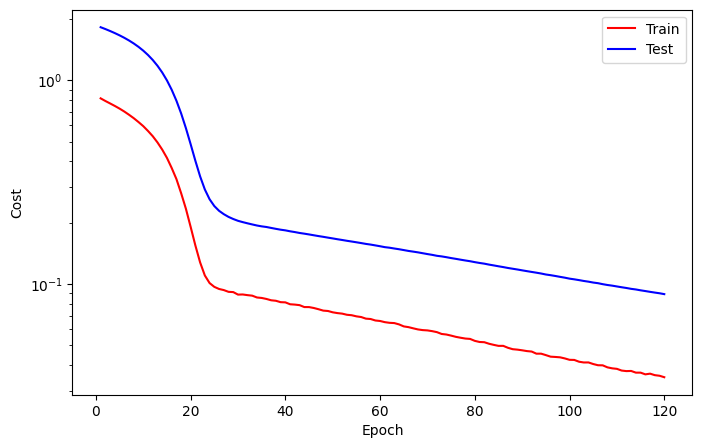

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   121
Train_cost  = 0.0346 | Test_cost  = 0.0888 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   122
Train_cost  = 0.0347 | Test_cost  = 0.0877 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   123
Train_cost  = 0.0343 | Test_cost  = 0.0871 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   124
Train_cost  = 0.0340 | Test_cost  = 0.0863 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   125
Train_cost  = 0.0340 | Test_cost  = 0.0857 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   126
Train_cost  = 0.0332 | Test_cost  = 0.0849 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   127
Train_cost  = 0.0330 | Test_cost  = 0.0842 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   128
Train_cost  = 0.0329 | Test_cost  = 0.0835 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   129
Train_cost  = 0.0322 | Test_cost  = 0.0828 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   130
Train_cost  = 0.0321 | Test_cost  = 0.0822 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   131
Train_cost  = 0.0318 | Test_cost  = 0.0816 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   132
Train_cost  = 0.0319 | Test_cost  = 0.0808 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   133
Train_cost  = 0.0313 | Test_cost  = 0.0803 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   134
Train_cost  = 0.0310 | Test_cost  = 0.0796 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   135
Train_cost  = 0.0311 | Test_cost  = 0.0790 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   136
Train_cost  = 0.0309 | Test_cost  = 0.0783 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   137
Train_cost  = 0.0301 | Test_cost  = 0.0778 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   138
Train_cost  = 0.0300 | Test_cost  = 0.0772 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   139
Train_cost  = 0.0299 | Test_cost  = 0.0768 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   140
Train_cost  = 0.0295 | Test_cost  = 0.0760 | 


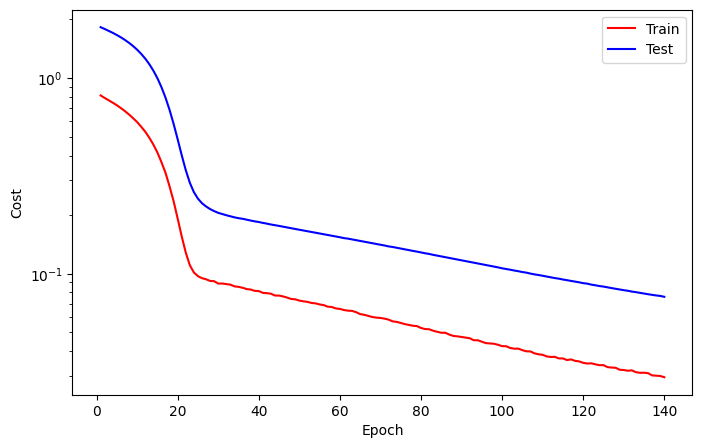

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   141
Train_cost  = 0.0296 | Test_cost  = 0.0754 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   142
Train_cost  = 0.0293 | Test_cost  = 0.0749 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   143
Train_cost  = 0.0294 | Test_cost  = 0.0744 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   144
Train_cost  = 0.0286 | Test_cost  = 0.0737 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   145
Train_cost  = 0.0287 | Test_cost  = 0.0732 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   146
Train_cost  = 0.0286 | Test_cost  = 0.0726 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   147
Train_cost  = 0.0283 | Test_cost  = 0.0720 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   148
Train_cost  = 0.0278 | Test_cost  = 0.0716 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   149
Train_cost  = 0.0278 | Test_cost  = 0.0710 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   150
Train_cost  = 0.0277 | Test_cost  = 0.0706 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   151
Train_cost  = 0.0270 | Test_cost  = 0.0700 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   152
Train_cost  = 0.0266 | Test_cost  = 0.0695 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   153
Train_cost  = 0.0266 | Test_cost  = 0.0691 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   154
Train_cost  = 0.0267 | Test_cost  = 0.0685 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   155
Train_cost  = 0.0263 | Test_cost  = 0.0680 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   156
Train_cost  = 0.0259 | Test_cost  = 0.0677 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   157
Train_cost  = 0.0258 | Test_cost  = 0.0670 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   158
Train_cost  = 0.0258 | Test_cost  = 0.0666 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   159
Train_cost  = 0.0258 | Test_cost  = 0.0660 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   160
Train_cost  = 0.0256 | Test_cost  = 0.0657 | 


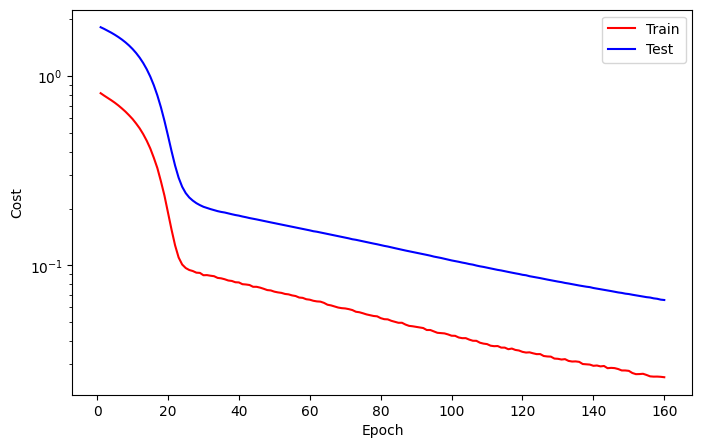

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   161
Train_cost  = 0.0252 | Test_cost  = 0.0650 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   162
Train_cost  = 0.0253 | Test_cost  = 0.0647 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   163
Train_cost  = 0.0249 | Test_cost  = 0.0641 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   164
Train_cost  = 0.0248 | Test_cost  = 0.0637 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   165
Train_cost  = 0.0245 | Test_cost  = 0.0633 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   166
Train_cost  = 0.0244 | Test_cost  = 0.0629 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   167
Train_cost  = 0.0236 | Test_cost  = 0.0623 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   168
Train_cost  = 0.0238 | Test_cost  = 0.0620 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   169
Train_cost  = 0.0235 | Test_cost  = 0.0614 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   170
Train_cost  = 0.0235 | Test_cost  = 0.0613 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   171
Train_cost  = 0.0234 | Test_cost  = 0.0605 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   172
Train_cost  = 0.0228 | Test_cost  = 0.0603 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   173
Train_cost  = 0.0230 | Test_cost  = 0.0596 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   174
Train_cost  = 0.0227 | Test_cost  = 0.0594 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   175
Train_cost  = 0.0228 | Test_cost  = 0.0588 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   176
Train_cost  = 0.0226 | Test_cost  = 0.0585 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   177
Train_cost  = 0.0220 | Test_cost  = 0.0579 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   178
Train_cost  = 0.0219 | Test_cost  = 0.0576 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   179
Train_cost  = 0.0217 | Test_cost  = 0.0571 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   180
Train_cost  = 0.0214 | Test_cost  = 0.0567 | 


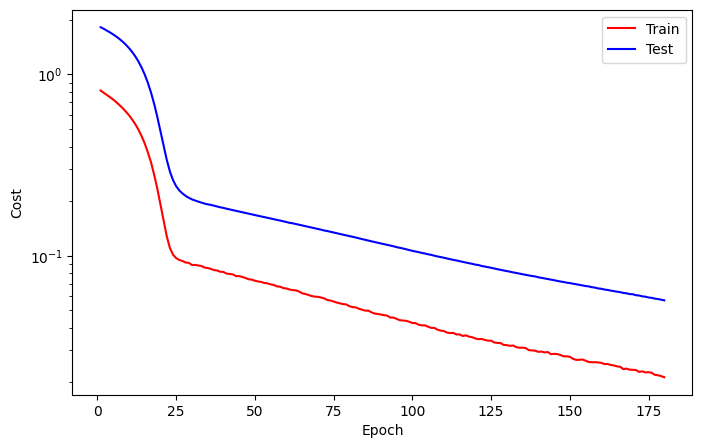

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   181
Train_cost  = 0.0214 | Test_cost  = 0.0564 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   182
Train_cost  = 0.0210 | Test_cost  = 0.0558 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   183
Train_cost  = 0.0210 | Test_cost  = 0.0555 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   184
Train_cost  = 0.0211 | Test_cost  = 0.0550 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   185
Train_cost  = 0.0208 | Test_cost  = 0.0547 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   186
Train_cost  = 0.0203 | Test_cost  = 0.0542 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   187
Train_cost  = 0.0201 | Test_cost  = 0.0538 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   188
Train_cost  = 0.0201 | Test_cost  = 0.0534 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   189
Train_cost  = 0.0200 | Test_cost  = 0.0530 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   190
Train_cost  = 0.0199 | Test_cost  = 0.0527 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   191
Train_cost  = 0.0196 | Test_cost  = 0.0522 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   192
Train_cost  = 0.0194 | Test_cost  = 0.0518 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   193
Train_cost  = 0.0192 | Test_cost  = 0.0514 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   194
Train_cost  = 0.0189 | Test_cost  = 0.0512 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   195
Train_cost  = 0.0193 | Test_cost  = 0.0506 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   196
Train_cost  = 0.0189 | Test_cost  = 0.0503 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   197
Train_cost  = 0.0188 | Test_cost  = 0.0499 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   198
Train_cost  = 0.0184 | Test_cost  = 0.0495 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   199
Train_cost  = 0.0182 | Test_cost  = 0.0491 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   200
Train_cost  = 0.0180 | Test_cost  = 0.0488 | 


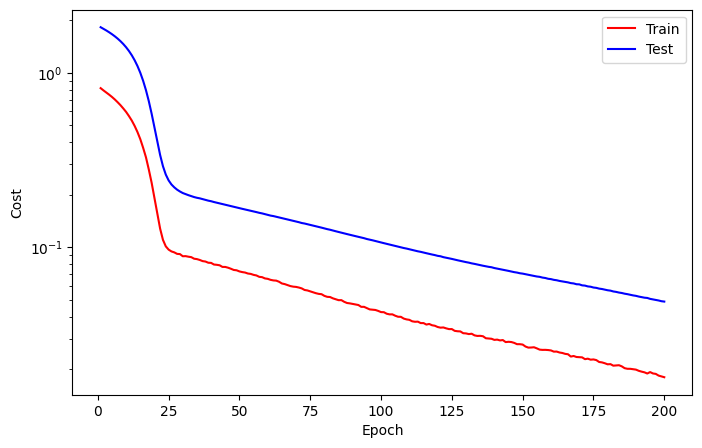

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   201
Train_cost  = 0.0179 | Test_cost  = 0.0483 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   202
Train_cost  = 0.0180 | Test_cost  = 0.0480 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   203
Train_cost  = 0.0180 | Test_cost  = 0.0476 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   204
Train_cost  = 0.0175 | Test_cost  = 0.0472 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   205
Train_cost  = 0.0171 | Test_cost  = 0.0468 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   206
Train_cost  = 0.0169 | Test_cost  = 0.0464 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   207
Train_cost  = 0.0170 | Test_cost  = 0.0461 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   208
Train_cost  = 0.0168 | Test_cost  = 0.0457 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   209
Train_cost  = 0.0166 | Test_cost  = 0.0455 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   210
Train_cost  = 0.0164 | Test_cost  = 0.0450 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   211
Train_cost  = 0.0163 | Test_cost  = 0.0448 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   212
Train_cost  = 0.0160 | Test_cost  = 0.0443 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   213
Train_cost  = 0.0162 | Test_cost  = 0.0441 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   214
Train_cost  = 0.0163 | Test_cost  = 0.0436 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   215
Train_cost  = 0.0156 | Test_cost  = 0.0435 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   216
Train_cost  = 0.0163 | Test_cost  = 0.0430 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   217
Train_cost  = 0.0160 | Test_cost  = 0.0429 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   218
Train_cost  = 0.0160 | Test_cost  = 0.0424 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   219
Train_cost  = 0.0156 | Test_cost  = 0.0423 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   220
Train_cost  = 0.0153 | Test_cost  = 0.0416 | 


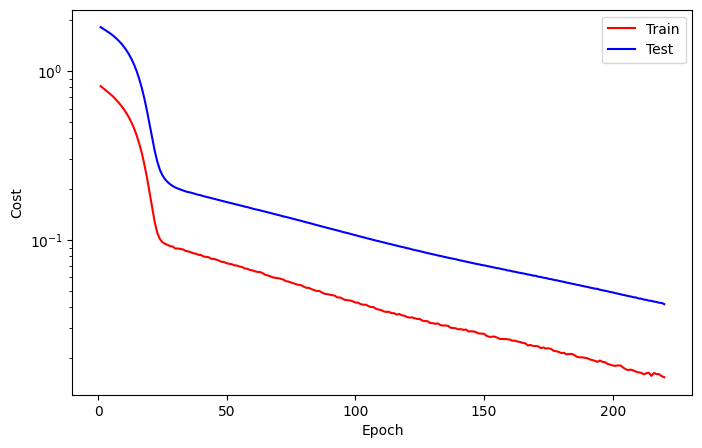

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   221
Train_cost  = 0.0152 | Test_cost  = 0.0415 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   222
Train_cost  = 0.0154 | Test_cost  = 0.0409 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   223
Train_cost  = 0.0151 | Test_cost  = 0.0408 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   224
Train_cost  = 0.0151 | Test_cost  = 0.0405 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   225
Train_cost  = 0.0147 | Test_cost  = 0.0407 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0405


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   226
Train_cost  = 0.0151 | Test_cost  = 0.0400 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   227
Train_cost  = 0.0148 | Test_cost  = 0.0400 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   228
Train_cost  = 0.0147 | Test_cost  = 0.0394 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   229
Train_cost  = 0.0144 | Test_cost  = 0.0392 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   230
Train_cost  = 0.0137 | Test_cost  = 0.0385 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   231
Train_cost  = 0.0143 | Test_cost  = 0.0385 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   232
Train_cost  = 0.0139 | Test_cost  = 0.0379 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   233
Train_cost  = 0.0140 | Test_cost  = 0.0379 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0379


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   234
Train_cost  = 0.0140 | Test_cost  = 0.0374 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   235
Train_cost  = 0.0131 | Test_cost  = 0.0371 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   236
Train_cost  = 0.0130 | Test_cost  = 0.0367 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   237
Train_cost  = 0.0132 | Test_cost  = 0.0365 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   238
Train_cost  = 0.0131 | Test_cost  = 0.0361 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   239
Train_cost  = 0.0128 | Test_cost  = 0.0358 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   240
Train_cost  = 0.0125 | Test_cost  = 0.0355 | 


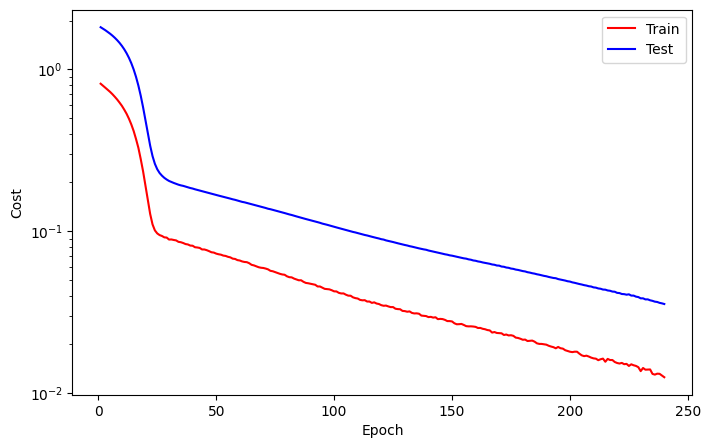

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   241
Train_cost  = 0.0126 | Test_cost  = 0.0353 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   242
Train_cost  = 0.0124 | Test_cost  = 0.0350 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   243
Train_cost  = 0.0124 | Test_cost  = 0.0348 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   244
Train_cost  = 0.0124 | Test_cost  = 0.0344 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   245
Train_cost  = 0.0124 | Test_cost  = 0.0342 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   246
Train_cost  = 0.0121 | Test_cost  = 0.0339 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   247
Train_cost  = 0.0120 | Test_cost  = 0.0337 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   248
Train_cost  = 0.0118 | Test_cost  = 0.0333 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   249
Train_cost  = 0.0119 | Test_cost  = 0.0332 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   250
Train_cost  = 0.0118 | Test_cost  = 0.0328 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   251
Train_cost  = 0.0119 | Test_cost  = 0.0327 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   252
Train_cost  = 0.0112 | Test_cost  = 0.0323 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   253
Train_cost  = 0.0114 | Test_cost  = 0.0320 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   254
Train_cost  = 0.0112 | Test_cost  = 0.0317 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   255
Train_cost  = 0.0112 | Test_cost  = 0.0315 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   256
Train_cost  = 0.0112 | Test_cost  = 0.0312 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   257
Train_cost  = 0.0111 | Test_cost  = 0.0309 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   258
Train_cost  = 0.0108 | Test_cost  = 0.0307 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   259
Train_cost  = 0.0106 | Test_cost  = 0.0304 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   260
Train_cost  = 0.0106 | Test_cost  = 0.0301 | 


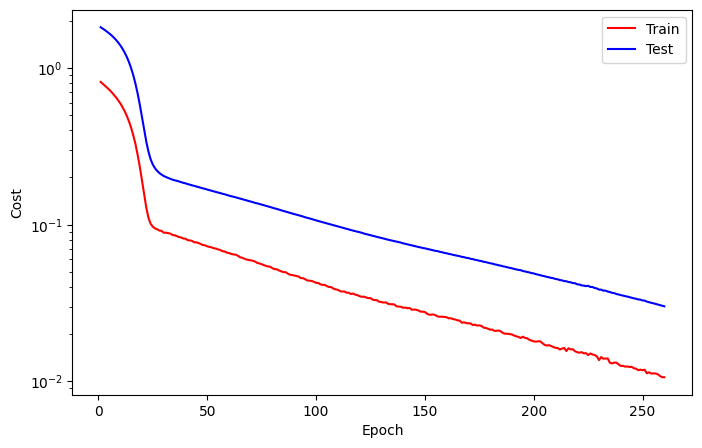

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   261
Train_cost  = 0.0105 | Test_cost  = 0.0299 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   262
Train_cost  = 0.0110 | Test_cost  = 0.0296 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   263
Train_cost  = 0.0107 | Test_cost  = 0.0294 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   264
Train_cost  = 0.0104 | Test_cost  = 0.0291 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   265
Train_cost  = 0.0100 | Test_cost  = 0.0288 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   266
Train_cost  = 0.0105 | Test_cost  = 0.0286 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   267
Train_cost  = 0.0099 | Test_cost  = 0.0284 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   268
Train_cost  = 0.0100 | Test_cost  = 0.0281 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   269
Train_cost  = 0.0098 | Test_cost  = 0.0278 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   270
Train_cost  = 0.0097 | Test_cost  = 0.0276 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   271
Train_cost  = 0.0099 | Test_cost  = 0.0274 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   272
Train_cost  = 0.0092 | Test_cost  = 0.0270 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   273
Train_cost  = 0.0095 | Test_cost  = 0.0269 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   274
Train_cost  = 0.0094 | Test_cost  = 0.0265 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   275
Train_cost  = 0.0092 | Test_cost  = 0.0263 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   276
Train_cost  = 0.0094 | Test_cost  = 0.0260 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   277
Train_cost  = 0.0087 | Test_cost  = 0.0258 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   278
Train_cost  = 0.0090 | Test_cost  = 0.0255 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   279
Train_cost  = 0.0089 | Test_cost  = 0.0254 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   280
Train_cost  = 0.0087 | Test_cost  = 0.0250 | 


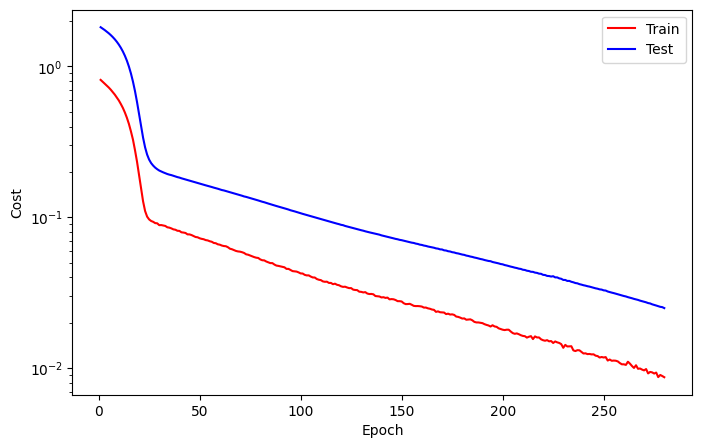

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   281
Train_cost  = 0.0087 | Test_cost  = 0.0248 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   282
Train_cost  = 0.0087 | Test_cost  = 0.0247 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   283
Train_cost  = 0.0088 | Test_cost  = 0.0243 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   284
Train_cost  = 0.0087 | Test_cost  = 0.0243 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   285
Train_cost  = 0.0083 | Test_cost  = 0.0239 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   286
Train_cost  = 0.0084 | Test_cost  = 0.0239 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   287
Train_cost  = 0.0085 | Test_cost  = 0.0234 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   288
Train_cost  = 0.0081 | Test_cost  = 0.0234 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0234


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   289
Train_cost  = 0.0082 | Test_cost  = 0.0230 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   290
Train_cost  = 0.0081 | Test_cost  = 0.0234 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0230


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   291
Train_cost  = 0.0084 | Test_cost  = 0.0228 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   292
Train_cost  = 0.0083 | Test_cost  = 0.0231 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0228


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   293
Train_cost  = 0.0084 | Test_cost  = 0.0225 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   294
Train_cost  = 0.0086 | Test_cost  = 0.0233 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0225


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   295
Train_cost  = 0.0084 | Test_cost  = 0.0222 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   296
Train_cost  = 0.0084 | Test_cost  = 0.0228 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0222


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   297
Train_cost  = 0.0083 | Test_cost  = 0.0218 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   298
Train_cost  = 0.0080 | Test_cost  = 0.0217 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   299
Train_cost  = 0.0074 | Test_cost  = 0.0211 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   300
Train_cost  = 0.0074 | Test_cost  = 0.0211 | 


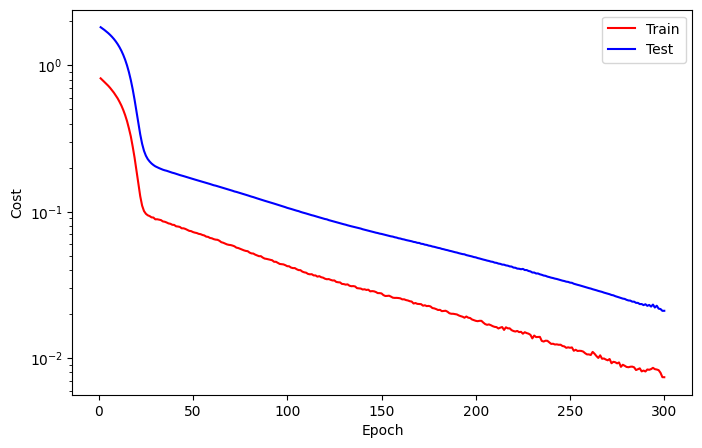

==> EarlyStop patience =  1 | Best test_cost: 0.0211


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   301
Train_cost  = 0.0073 | Test_cost  = 0.0206 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   302
Train_cost  = 0.0074 | Test_cost  = 0.0207 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0206


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   303
Train_cost  = 0.0071 | Test_cost  = 0.0203 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   304
Train_cost  = 0.0070 | Test_cost  = 0.0202 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   305
Train_cost  = 0.0067 | Test_cost  = 0.0200 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   306
Train_cost  = 0.0068 | Test_cost  = 0.0198 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   307
Train_cost  = 0.0066 | Test_cost  = 0.0197 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   308
Train_cost  = 0.0067 | Test_cost  = 0.0195 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   309
Train_cost  = 0.0070 | Test_cost  = 0.0195 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   310
Train_cost  = 0.0067 | Test_cost  = 0.0191 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   311
Train_cost  = 0.0065 | Test_cost  = 0.0193 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0191


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   312
Train_cost  = 0.0068 | Test_cost  = 0.0188 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   313
Train_cost  = 0.0065 | Test_cost  = 0.0189 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0188


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   314
Train_cost  = 0.0066 | Test_cost  = 0.0185 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   315
Train_cost  = 0.0066 | Test_cost  = 0.0185 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0185


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   316
Train_cost  = 0.0062 | Test_cost  = 0.0182 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   317
Train_cost  = 0.0063 | Test_cost  = 0.0181 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   318
Train_cost  = 0.0061 | Test_cost  = 0.0179 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   319
Train_cost  = 0.0060 | Test_cost  = 0.0178 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   320
Train_cost  = 0.0062 | Test_cost  = 0.0176 | 


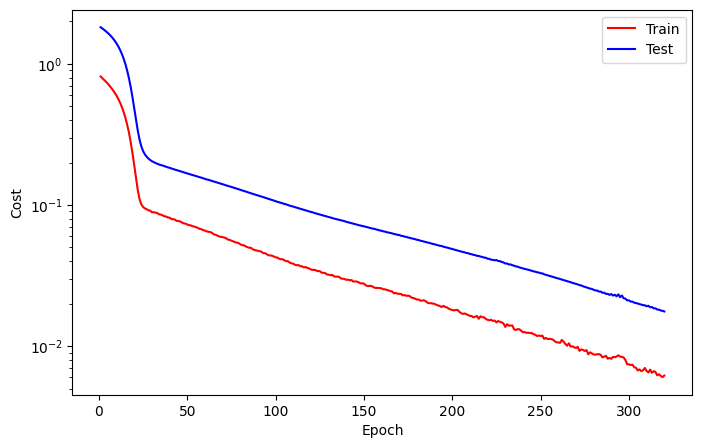

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   321
Train_cost  = 0.0060 | Test_cost  = 0.0174 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   322
Train_cost  = 0.0060 | Test_cost  = 0.0173 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   323
Train_cost  = 0.0061 | Test_cost  = 0.0173 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0173


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   324
Train_cost  = 0.0062 | Test_cost  = 0.0169 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   325
Train_cost  = 0.0058 | Test_cost  = 0.0169 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0169


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   326
Train_cost  = 0.0058 | Test_cost  = 0.0166 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   327
Train_cost  = 0.0058 | Test_cost  = 0.0165 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   328
Train_cost  = 0.0056 | Test_cost  = 0.0163 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   329
Train_cost  = 0.0056 | Test_cost  = 0.0162 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   330
Train_cost  = 0.0056 | Test_cost  = 0.0160 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   331
Train_cost  = 0.0056 | Test_cost  = 0.0160 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   332
Train_cost  = 0.0054 | Test_cost  = 0.0157 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   333
Train_cost  = 0.0055 | Test_cost  = 0.0157 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0157


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   334
Train_cost  = 0.0054 | Test_cost  = 0.0154 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   335
Train_cost  = 0.0052 | Test_cost  = 0.0156 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0154


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   336
Train_cost  = 0.0051 | Test_cost  = 0.0151 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   337
Train_cost  = 0.0050 | Test_cost  = 0.0153 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0151


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   338
Train_cost  = 0.0051 | Test_cost  = 0.0148 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   339
Train_cost  = 0.0051 | Test_cost  = 0.0151 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0148


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   340
Train_cost  = 0.0053 | Test_cost  = 0.0146 | 


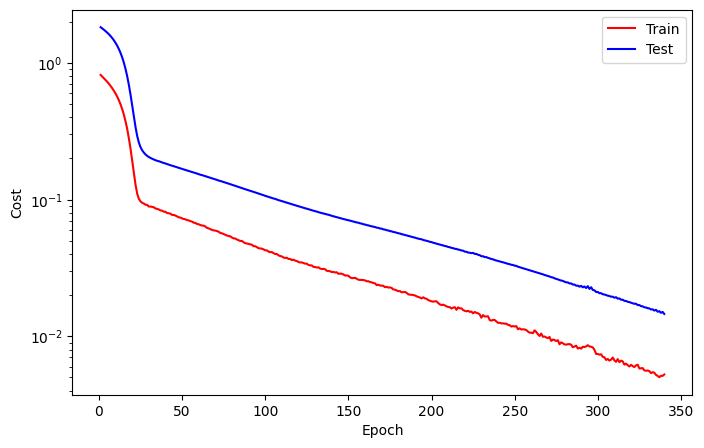

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   341
Train_cost  = 0.0051 | Test_cost  = 0.0150 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0146


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   342
Train_cost  = 0.0051 | Test_cost  = 0.0143 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   343
Train_cost  = 0.0049 | Test_cost  = 0.0147 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0143


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   344
Train_cost  = 0.0052 | Test_cost  = 0.0140 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   345
Train_cost  = 0.0048 | Test_cost  = 0.0146 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0140


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   346
Train_cost  = 0.0051 | Test_cost  = 0.0139 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   347
Train_cost  = 0.0053 | Test_cost  = 0.0149 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0139


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   348
Train_cost  = 0.0055 | Test_cost  = 0.0139 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   349
Train_cost  = 0.0051 | Test_cost  = 0.0149 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0139


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   350
Train_cost  = 0.0057 | Test_cost  = 0.0137 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   351
Train_cost  = 0.0052 | Test_cost  = 0.0140 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0137


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   352
Train_cost  = 0.0049 | Test_cost  = 0.0131 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   353
Train_cost  = 0.0046 | Test_cost  = 0.0133 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0131


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   354
Train_cost  = 0.0046 | Test_cost  = 0.0129 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   355
Train_cost  = 0.0046 | Test_cost  = 0.0130 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0129


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   356
Train_cost  = 0.0048 | Test_cost  = 0.0127 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   357
Train_cost  = 0.0045 | Test_cost  = 0.0128 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0127


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   358
Train_cost  = 0.0043 | Test_cost  = 0.0125 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   359
Train_cost  = 0.0042 | Test_cost  = 0.0126 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0125


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   360
Train_cost  = 0.0044 | Test_cost  = 0.0124 | 


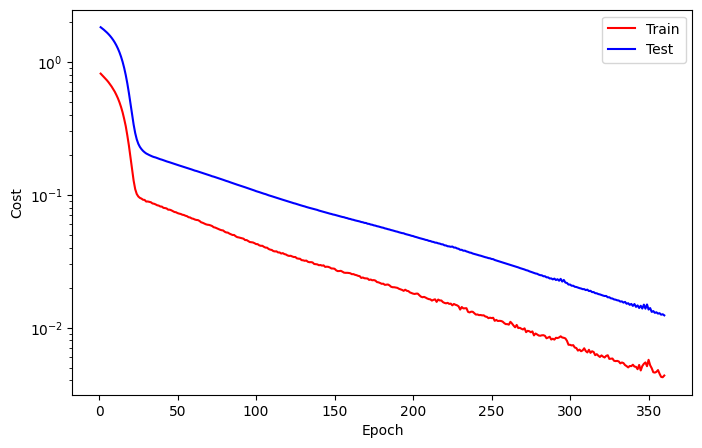

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   361
Train_cost  = 0.0042 | Test_cost  = 0.0123 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   362
Train_cost  = 0.0042 | Test_cost  = 0.0121 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   363
Train_cost  = 0.0042 | Test_cost  = 0.0122 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0121


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   364
Train_cost  = 0.0040 | Test_cost  = 0.0120 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   365
Train_cost  = 0.0042 | Test_cost  = 0.0119 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   366
Train_cost  = 0.0040 | Test_cost  = 0.0118 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   367
Train_cost  = 0.0043 | Test_cost  = 0.0118 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0118


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   368
Train_cost  = 0.0039 | Test_cost  = 0.0117 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   369
Train_cost  = 0.0040 | Test_cost  = 0.0115 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   370
Train_cost  = 0.0039 | Test_cost  = 0.0115 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   371
Train_cost  = 0.0040 | Test_cost  = 0.0114 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   372
Train_cost  = 0.0040 | Test_cost  = 0.0112 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   373
Train_cost  = 0.0040 | Test_cost  = 0.0113 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0112


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   374
Train_cost  = 0.0043 | Test_cost  = 0.0110 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   375
Train_cost  = 0.0040 | Test_cost  = 0.0112 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0110


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   376
Train_cost  = 0.0038 | Test_cost  = 0.0108 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   377
Train_cost  = 0.0037 | Test_cost  = 0.0109 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0108


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   378
Train_cost  = 0.0040 | Test_cost  = 0.0106 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   379
Train_cost  = 0.0036 | Test_cost  = 0.0107 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0106


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   380
Train_cost  = 0.0037 | Test_cost  = 0.0105 | 


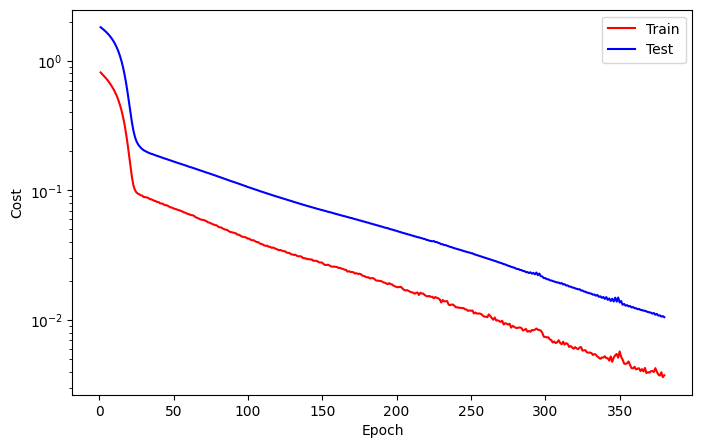

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   381
Train_cost  = 0.0036 | Test_cost  = 0.0107 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0105


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   382
Train_cost  = 0.0037 | Test_cost  = 0.0103 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   383
Train_cost  = 0.0037 | Test_cost  = 0.0111 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0103


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   384
Train_cost  = 0.0038 | Test_cost  = 0.0102 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   385
Train_cost  = 0.0039 | Test_cost  = 0.0109 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0102


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   386
Train_cost  = 0.0039 | Test_cost  = 0.0100 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   387
Train_cost  = 0.0039 | Test_cost  = 0.0107 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0100


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   388
Train_cost  = 0.0039 | Test_cost  = 0.0099 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   389
Train_cost  = 0.0038 | Test_cost  = 0.0104 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0099


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   390
Train_cost  = 0.0038 | Test_cost  = 0.0098 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   391
Train_cost  = 0.0040 | Test_cost  = 0.0108 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0098


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   392
Train_cost  = 0.0038 | Test_cost  = 0.0096 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   393
Train_cost  = 0.0037 | Test_cost  = 0.0103 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0096


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   394
Train_cost  = 0.0036 | Test_cost  = 0.0094 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   395
Train_cost  = 0.0037 | Test_cost  = 0.0100 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0094


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   396
Train_cost  = 0.0037 | Test_cost  = 0.0093 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   397
Train_cost  = 0.0033 | Test_cost  = 0.0096 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0093


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   398
Train_cost  = 0.0036 | Test_cost  = 0.0092 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   399
Train_cost  = 0.0037 | Test_cost  = 0.0098 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0092


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   400
Train_cost  = 0.0036 | Test_cost  = 0.0091 | 


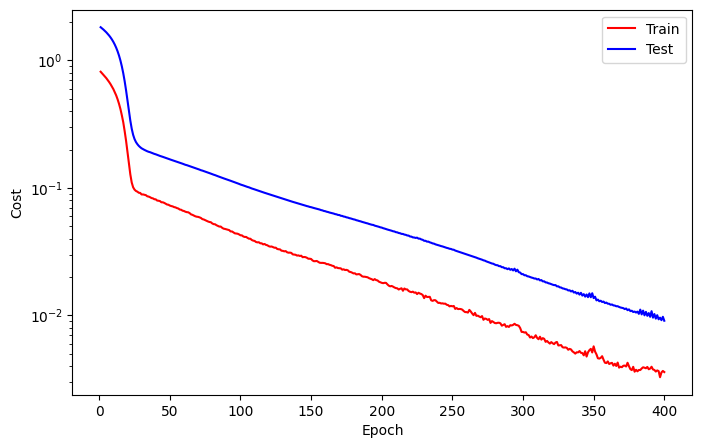

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   401
Train_cost  = 0.0033 | Test_cost  = 0.0094 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0091


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   402
Train_cost  = 0.0034 | Test_cost  = 0.0090 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   403
Train_cost  = 0.0034 | Test_cost  = 0.0093 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0090


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   404
Train_cost  = 0.0034 | Test_cost  = 0.0089 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   405
Train_cost  = 0.0031 | Test_cost  = 0.0091 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0089


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   406
Train_cost  = 0.0033 | Test_cost  = 0.0088 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   407
Train_cost  = 0.0034 | Test_cost  = 0.0091 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0088


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   408
Train_cost  = 0.0033 | Test_cost  = 0.0087 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   409
Train_cost  = 0.0032 | Test_cost  = 0.0087 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0087


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   410
Train_cost  = 0.0034 | Test_cost  = 0.0086 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   411
Train_cost  = 0.0034 | Test_cost  = 0.0086 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0086


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   412
Train_cost  = 0.0032 | Test_cost  = 0.0085 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   413
Train_cost  = 0.0032 | Test_cost  = 0.0086 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0085


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   414
Train_cost  = 0.0032 | Test_cost  = 0.0084 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   415
Train_cost  = 0.0032 | Test_cost  = 0.0084 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0084


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   416
Train_cost  = 0.0030 | Test_cost  = 0.0082 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   417
Train_cost  = 0.0033 | Test_cost  = 0.0083 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0082


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   418
Train_cost  = 0.0031 | Test_cost  = 0.0082 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   419
Train_cost  = 0.0032 | Test_cost  = 0.0082 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0082


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   420
Train_cost  = 0.0030 | Test_cost  = 0.0081 | 


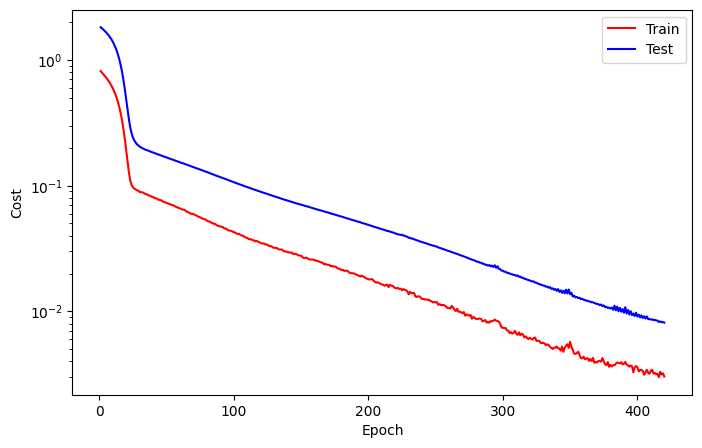

Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   421
Train_cost  = 0.0030 | Test_cost  = 0.0081 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0081


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   422
Train_cost  = 0.0030 | Test_cost  = 0.0080 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   423
Train_cost  = 0.0031 | Test_cost  = 0.0082 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0080


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   424
Train_cost  = 0.0032 | Test_cost  = 0.0079 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   425
Train_cost  = 0.0031 | Test_cost  = 0.0079 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   426
Train_cost  = 0.0031 | Test_cost  = 0.0078 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   427
Train_cost  = 0.0030 | Test_cost  = 0.0079 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0078


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   428
Train_cost  = 0.0031 | Test_cost  = 0.0078 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   429
Train_cost  = 0.0031 | Test_cost  = 0.0077 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   430
Train_cost  = 0.0030 | Test_cost  = 0.0078 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0077


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   431
Train_cost  = 0.0029 | Test_cost  = 0.0076 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   432
Train_cost  = 0.0029 | Test_cost  = 0.0075 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   433
Train_cost  = 0.0031 | Test_cost  = 0.0077 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0075


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   434
Train_cost  = 0.0030 | Test_cost  = 0.0074 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   435
Train_cost  = 0.0030 | Test_cost  = 0.0075 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0074


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   436
Train_cost  = 0.0030 | Test_cost  = 0.0074 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0074


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   437
Train_cost  = 0.0031 | Test_cost  = 0.0074 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   438
Train_cost  = 0.0028 | Test_cost  = 0.0075 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0074


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   439
Train_cost  = 0.0030 | Test_cost  = 0.0072 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   440
Train_cost  = 0.0030 | Test_cost  = 0.0075 | 


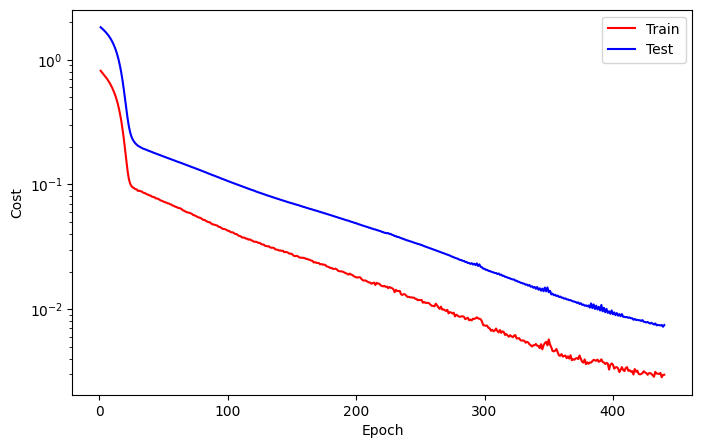

==> EarlyStop patience =  1 | Best test_cost: 0.0072


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   441
Train_cost  = 0.0030 | Test_cost  = 0.0071 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   442
Train_cost  = 0.0027 | Test_cost  = 0.0077 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0071


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   443
Train_cost  = 0.0030 | Test_cost  = 0.0070 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   444
Train_cost  = 0.0029 | Test_cost  = 0.0077 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0070


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   445
Train_cost  = 0.0030 | Test_cost  = 0.0069 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   446
Train_cost  = 0.0029 | Test_cost  = 0.0076 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0069


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   447
Train_cost  = 0.0030 | Test_cost  = 0.0069 | 


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   448
Train_cost  = 0.0032 | Test_cost  = 0.0081 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0069


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   449
Train_cost  = 0.0034 | Test_cost  = 0.0069 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0069


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   450
Train_cost  = 0.0034 | Test_cost  = 0.0086 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0069


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   451
Train_cost  = 0.0037 | Test_cost  = 0.0073 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0069


Train:   0%|          | 0/31 [00:00<?, ?it/s]

Test:   0%|          | 0/8 [00:00<?, ?it/s]


Epoch   452
Train_cost  = 0.0039 | Test_cost  = 0.0088 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0069
==> Execute Early Stopping at epoch: 452 | Best test_cost: 0.0069
==> Best model is saved at model/jkse/


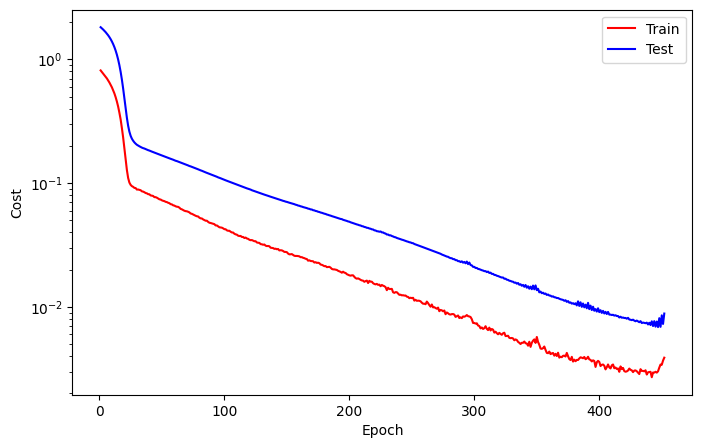

(N, S, F): (1939, 1, 1)
Note: last 0 data excluded

(N, S, F): (485, 1, 1)
Note: last 0 data excluded



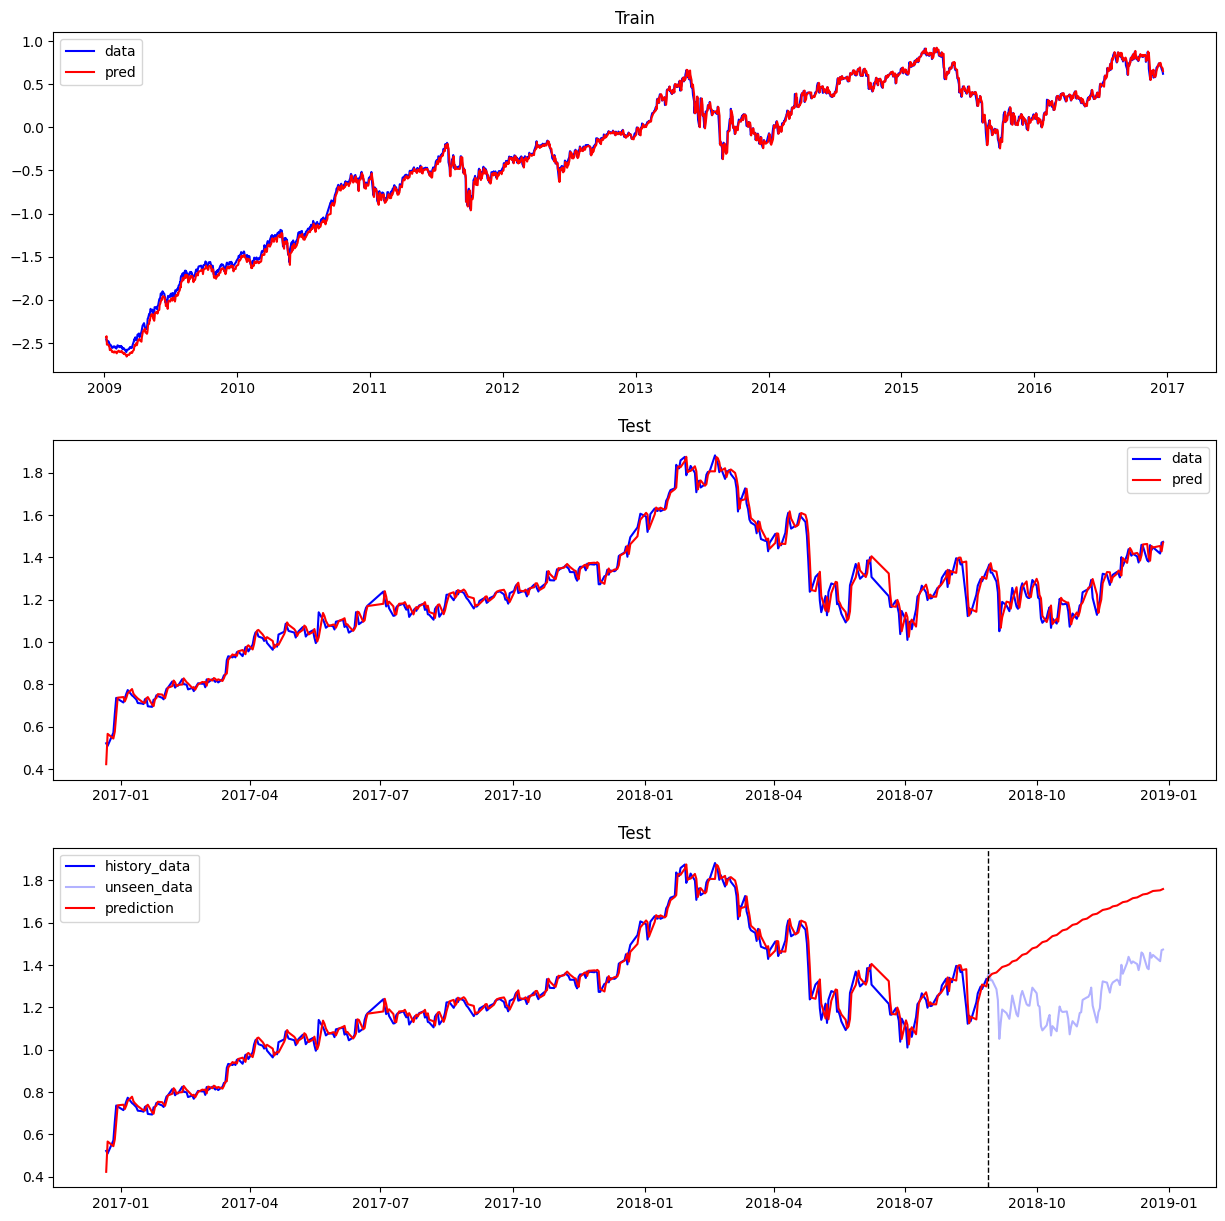

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
from torch import nn, optim
from jcopdl.callback import Callback
from jcopdl.utils.dataloader import TimeSeriesDataset
from torch.utils.data import DataLoader

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

class RNN(nn.Module):
    def __init__(self, cell_type, input_size, output_size, hidden_size, num_layers, dropout, bidirectional):
        super().__init__()
        
        if cell_type == "rnn":
            rnn_block = nn.RNN
        elif cell_type == "lstm":
            rnn_block = nn.LSTM
        elif cell_type == "gru":
            rnn_block = nn.GRU
        
        self.rnn = rnn_block(input_size, hidden_size, num_layers, dropout=dropout, bidirectional=bidirectional)
        
        if bidirectional:
            hidden_size = 2*hidden_size
            
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden):        
        x, hidden = self.rnn(x, hidden)
        x = self.fc(x)
        return x, hidden
    
if data == "damped_sine":
    df = pd.read_csv("/kaggle/input/rnn-dataset/data/sine_new.csv", parse_dates=["Date"], index_col="Date")
    df.value = df.value.transform(lambda x: (x-x.mean())/x.std())
    col = "value"    
elif data == "jkse":
    df = pd.read_csv("/kaggle/input/rnn-dataset/data/jkse.csv", parse_dates=["Date"], index_col="Date")
    df = df[~df.price.isna()]
    df.price = df.price.transform(lambda x: (x-x.mean())/x.std())
    col = "price"

ts_train, ts_test = train_test_split(df, test_size=0.2, shuffle=False)

train_set = TimeSeriesDataset(ts_train, col, config.seq_len)
trainloader = DataLoader(train_set, batch_size=config.batch_size)

test_set = TimeSeriesDataset(ts_test, col, config.seq_len)
testloader = DataLoader(test_set, batch_size=config.batch_size)

model = RNN(config.cell_type, config.input_size, config.output_size, config.hidden_size, 
            config.num_layers, config.dropout, config.bidirectional).to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = optim.AdamW(model.parameters(), lr=lr)
callback = Callback(model, config, outdir=f'model/{data}/')

from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output, hidden = model(feature, None)
        loss = criterion(output, target)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost

while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break
        
# Forecast
train_forecast_set = TimeSeriesDataset(ts_train, col, 1)
trainforecastloader = DataLoader(train_forecast_set)

test_forecast_set = TimeSeriesDataset(ts_test, col, 1)
testforecastloader = DataLoader(test_forecast_set)

plt.figure(figsize=(15, 15))
    
plt.subplot(311)
data4pred(model, train_forecast_set, trainforecastloader, device)
plt.title("Train")

plt.subplot(312)
data4pred(model, test_forecast_set, testforecastloader, device)
plt.title("Test")

plt.subplot(313)
pred4pred(model, test_forecast_set, testforecastloader, device, n_prior=400, n_forecast=100)
plt.title("Test");